## IAMSI -- 2022-2023

_&copy; Equipe pédagogique : Gauvain Bourgne, Jean-Gabriel Ganascia, Marie-Jeanne Lesot, Christophe Marsala, Nicolas Maudet._


# TME 1 et 2 : Jeu à 2 joueurs - Programmation d'un joueur d'Awélé


<font color="RED" size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms**


[@dataymeric](https://github.com/dataymeric) <br/>
[@Geriogerg](https://github.com/Geriogerg)


<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur `tme01et02` et rajouter à la suite de `tme01et02` les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient : <pre>tme01et02-Skywalker-Solo</pre>

Penser à sauvegarder fréquemment le fichier en cours de travail :

- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S


## Présentation


### Objectifs des TME 1 et 2

Le travail à réaliser est le suivant : programmer en Python un joueur artificiel d'Awélé. Il peut être utile de commencer par prendre connaissance des règles du jeu fournies en annexe à la fin de cette page.

_A noter_ : Il est autorisé d'écrire des fonctions auxiliaires permettant de simplifier l'écriture
de la fonction répondant à une question. Dans ce cas, ces fonctions doivent être dûment commentées et spécifiées.


#### Compte-rendu des séances de TME 1 et 2

Le fichier ipython que vous remplissez ici fait office de compte-rendu pour ces 2 séances de TME.

Il y a 2 soumissions à faire **obligatoirement** sur le site Moodle :

- 1er compte-rendu : <font color="RED">à l'issue de la première séance</font>, soumettre ce qui a été réalisé lors de la séance.
- 2e compte-rendu : <font color="RED">à l'issue de la deuxième séance</font>, soumettre la version finale du travail réalisé durant les 2 séances.

Votre compte-rendu a la forme d'un unique fichier ipynb (ce fichier-ci complété, NON ZIPPE).


### Grille de notation

Le barème (indicatif) pour la notation de ce TME est le suivant :

- implémentation correcte et effective du minimax : 9 sur 20
- implémentation correcte et effective de l'alpha-bêta : 14 sur 20
- implémentation d'améliorations ou d'extensions ("pour aller plus loin...") : +0 à +3 points
- programme commenté : -1 à +1 points
- efficacité des fonctions : -1 à +2 points

La note finale ne dépassera pas 20.


## Apprendre à utiliser IPython Notebook

Ce document est dynamique : il est composé de "boîtes" qui peuvent être "compilées" par la commande "Run Cells" du menu "Cell" (ou bien en cliquant sur l'icône >| ou par la combinaison des touches [SHIFT][entree]).

Il y a **2 types principaux** de boîtes :

- les boîtes "Markdown" : tout ce qui est tapé dans ces boîtes est du texte qui sera rendu "joliment" après avoir été compilé. On peut y écrire des commandes en $\LaTeX$ pour définir des équations, et il reconnaît certaines balises HTML. En cliquant 2 fois dans une boîte Markdown compilée, on a accès à son contenu et on peut alors le modifier.
- les boîtes "Code" : dans ces boîtes, on écrit du code Python. La compilation de la boîte produit l'exécution de ce code Python et produit une boîte "Out" dans laquelle le résultat de la dernière commande est affiché. On peut y écrire tout code Python valide. Ce type de boîtes se reconnaît par "In [n]" inscrit à côté de leur coin haut gauche ("n" est un entier).

Le type d'une boîte peut être modifié à l'aide du menu en haut de la page (juste au dessus du texte).

L'icône "+" permet de créer une nouvelle boîte juste en dessous de la boîte active.

L'icône avec les ciseaux permet d'effacer la boîte active (attention ! c'est **irréversible !**).

Pour en savoir plus :

- http://ipython.org/

Vous pouvez aussi vous référer à la documentation Python :

- https://www.python.org/

Dans ce qui suit, les boîtes Markdown commençant par <font color="RED" size="+1">**[Q]**</font> posent des questions auxquelles il faut répondre dans la boîte qui suit directement (éventuellement, en créant des nouvelles boîtes).
Certaines des boîtes "Code" à remplir sont suivies d'une sortie "Out[.]:" qui montre un exemple de résultat attendu.


In [ ]:
# exemple de boîte de code :
#    --> sélectionner cette boîte (en cliquant à l'intérieur)
#    --> effectuer "Run Cells" du Menu "Cell" (ou bien cliquer sur l'icône >|)

print("Un essai quelconque :")
2 + 3

Un essai quelconque :


5

<font color="RED" size="+1">**[Q]**</font> Dans la boîte "Code" suivante, donner les instructions Python pour effectuer le calcul :
$$-\frac{1}{3}\log_2(\frac{1}{3})-\frac{2}{3}\log_2(\frac{2}{3})$$

Dont la valeur à trouver est :
0.9182958340544896


In [ ]:
import math

-1 / 3 * math.log(1 / 3, 2) - 2 / 3 * math.log(2 / 3, 2)

0.9182958340544896

**<font style="BACKGROUND-COLOR: lightgray" color='red'> Important</font>** :
en lisant ce texte sur votre ordinateur, pensez bien à exécuter les boîtes "Code" dans l'ordre de leur apparition. Toute la page se comporte comme une session Python unique et il pour exécuter certaines boîtes il est nécessaire que les précédentes aient été exécutées au préalable.


Une fonction utile dans la suite est la fonction `input` qui permet de demander à l'entrée d'une valeur saisie au clavier.


In [ ]:
# Exemple d'utilisation de input():
annee_naiss = input("Entrer l'année de naissance : ")
print("Cela fait donc", 2023 - int(annee_naiss), "ans.")

Cela fait donc 23 ans.


## Programmer un joueur d'Awélé

Les règles de ce jeu sont rappelées à la fin de ce notebook.


### Structure de données


Pour représenter une position d'Awélé en Python. Une _position_ est définie par les éléments suivants :

- une _dimension_ qui correspond au nombre de colonnes (dans l'Awélé original, il y a 6 colonnes). On note $n$ ce nombre de colonnes dans la suite de ce texte ;
- un _plateau_ qui correspond au plateau de jeu et donne le nombre de graines dans chaque case ;
- un _nombre_ qui correspond au nombre total de graines sur le plateau au début du jeu (dépend du nombre de dimensions et du nombre de graines dans chaque case au départ) ;
- le _trait_ qui correspond au camp devant jouer dans la position donnée. Il y a
  deux camps: "NORD et "SUD" ;
- le _gain_ qui correspond au nombre de graines déjà ramassées par chacun des joueurs.

En Python, on choisit de représenter une telle position sous la forme d'un dictionnaire qui associe à chaque nom de champ sa valeur.

        # Représentation Python d'une position du jeu d'Awélé:
        position = dict()       # initialisation
        position['plateau']     # les cases du jeu (voir ci-dessous)
        position['dimension']   # le nombre de colonnes du plateau
        position['nb_total']    # nombre de graines total au début du jeu sur tout le plateau
        position['trait']       # le joueur qui doit jouer : 'SUD' ou 'NORD'
        position['gain']        # les graines prises par chaque joueur sous la forme : {'SUD':0, 'NORD':0}


Dans ce qui suit, on distingue :

- un coup _correct_ qui correspond à un numéro de colonne correct (valeur comprise entre 1 et $n$), et pour lequel la case correspondante contient au moins une graine ;
- un coup _autorisé_ qui est un coup à la fois correct et permettant d'atteindre une position légale du jeu, c'est-à-dire une position qui respecte la règle obligeant à laisser au moins une graine dans le camp de son adversaire.


### Représentation du plateau de jeu en Python

Pour représenter le plateau en Python, on utilise une liste d'entiers, chaque entier correspondant au nombre de graines dans une case.

Soit un plateau de jeu de $n$ colonnes.

Pour le camp SUD :

- le nombre de graines de la case de la colonne 1 est stocké en position $0$ dans la liste Python ;
- le nombre de graines de la case de la colonne 2 est stocké en position $1$ dans la liste Python ;
- ...
- le nombre de graines de la case de la colonne $n$ est stocké en position $n-1$ dans la liste Python.

Pour le camp NORD :

- le nombre de graines de la case de la colonne 1 est stocké en position $2n-1$ dans la liste Python ;
- le nombre de graines de la case de la colonne 2 est stocké en position $2n-2$ dans la liste Python ;
- ...
- le nombre de graines de la case de la colonne $n$ est stocké en position $n$ dans la liste Python.

Cette représentation à l'avantage de favoriser le parcours des cases du plateau : en parcourant la liste par positions croissantes, on retrouve le parcours en sens inverse des aiguilles d'une montre. Ce parcours peut alors se faire en Python en incrémentant de 1 la position pour passer à la case suivante, et en réalisant un calcul modulo $2n$.


### Package IAMSI et fonctions fournies

Le package IAMSI fourni avec ce sujet doit être placé dans le même répertoire que ce notebook.
Elle contient la librairie de fonctions de nom <i>awele</i> qui fournit plusieurs fonctions que vous pourrez utiliser :

- `position_initiale(n, nb_graines)` : qui définit la position initiale du jeu. Les arguments sont des entiers : `n` donne le nombre de colonnes du plateau du jeu, et `nb_graines` donne le nombre de graines à mettre dans chaque case (par défaut, cet argument vaut 4);
- `affichage(position)` : affichage de façon textuelle d'une position ;
- `duplique(position)` : recopie d'une position en la dupliquant pour pouvoir y apporter des modifications sans altérer la position originale ;
- `joue_un_coup(position,coup)` : renvoie la position obtenue une fois le coup joué dans la position donnée. **Important :** cette fonction fait l'hypothèse que le coup donné est un coup correct et elle ne vérifie donc pas que la position résultante est bien une position légale du jeu (cela se fait par ailleurs).

_Remarque_ : il est nécessaire d'importer la librairie et pour utiliser ces fonctions, il faudra préfixer leur nom par le nom d'importation de a librairie.


In [ ]:
# importation de la librairie awele :
# La ligne suivante permet de préciser le chemin d'accès à la librairie awele
import sys

sys.path.append("../")

from IAMSI import awele as aw

Les instructions qui suivent permettent de voir comment utiliser les fonctions fournies.


In [ ]:
# ------------------------- POUR VOIR COMMENT CA MARCHE :
maPosition = aw.position_initiale(6)
aw.affichage(maPosition)
print("Nombre de graines au total : ", maPosition["nb_total"])
maPosition2 = aw.joue_un_coup(maPosition, 1)  # SUD joue
maPosition2 = aw.joue_un_coup(maPosition2, 1)  # NORD joue
maPosition2 = aw.joue_un_coup(maPosition2, 2)  # SUD joue
maPosition2 = aw.joue_un_coup(maPosition2, 4)  # NORD joue
maPosition2 = aw.joue_un_coup(maPosition2, 3)  # SUD joue
maPosition2 = aw.joue_un_coup(maPosition2, 2)  # NORD joue
maPosition2 = aw.joue_un_coup(maPosition2, 5)  # SUD joue
aw.affichage(maPosition2)
print("#######################################\nPartie sur un tablier réduit pour tester:")
maPosition = aw.position_initiale(3, 2)
aw.affichage(maPosition)
maPosition2 = aw.joue_un_coup(maPosition, 1)  # SUD joue
maPosition2 = aw.joue_un_coup(maPosition2, 1)  # NORD joue
maPosition2 = aw.joue_un_coup(maPosition2, 3)  # SUD joue
maPosition2 = aw.joue_un_coup(maPosition2, 3)  # NORD joue
maPosition2 = aw.joue_un_coup(maPosition2, 1)  # SUD joue
maPosition2 = aw.joue_un_coup(maPosition2, 1)  # NORD joue
aw.affichage(maPosition2)
print("#######################################\nEssai de prises:")
maPosition = aw.position_initiale(6)
maPosition["tablier"] = [1, 2, 3, 4, 5, 1, 2, 2, 2, 2, 2, 2]
aw.affichage(maPosition)
maPosition2 = aw.joue_un_coup(maPosition, 5)  # SUD joue
aw.affichage(maPosition2)
# ------------------------- FIN TEST

* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 	 5 	 6 
        	[4]	[4]	[4]	[4]	[4]	[4]
        	[4]	[4]	[4]	[4]	[4]	[4]
colonnes:	 1 	 2 	 3 	 4 	 5 	 6 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD

Nombre de graines au total :  48
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 2)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 	 5 	 6 
        	[0]	[1]	[7]	[2]	[7]	[7]
        	[1]	[1]	[1]	[9]	[0]	[7]
colonnes:	 1 	 2 	 3 	 4 	 5 	 6 

- - - - - - - - - - - - - - - >
		SUD (prises: 3)

-> camp au trait: NORD

#######################################
Partie sur un tablier réduit pour tester:
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 
        	[2]	[2]	[2]
        	[2]	[2]	[2]
colonnes:	 1 	 2 	 3 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD

* * * * * * * * * * * * * * * * 

### Fonctions simples

Les fonctions que vous allez écrire dans la suite seront mises directement dans ce notebook (pas dans la librairie).


<font color="RED" size="+1">**[Q]**</font> Ecrire les fonctions suivantes :

- `est_correct(position, nombre)`: rend le booléen `True` si le nombre donné peut être un coup correct dans la position donnée, c'est-à-dire si ce nombre est un entier compris entre 1
  et `n` et si de plus la case correspondante du plateau (pour le camp qui doit donc jouer dans la position) contient au moins une graine.
- `est_legale(position)`: rend le booléen `True` si la position donnée est légale, c'est-à-dire si le camp qui doit jouer possède au moins une graine dans son camp.
- `effectue_si_valide(position, coup)`: rend la nouvelle position obtenue en jouant `coup`
  dans la position donnée. Cette fonction retourne le booléen `False` si le coup
  n'est pas correct ou si la position résultante n'est pas une position légale du jeu.
- `est_terminale(position)`: rend le booléen `True` si la position est
  terminale, c'est-à-dire si aucun coup n'est correct, ou si tout coup correct ne permet
  pas d'atteindre une position légale ou bien si l'un des deux joueurs a gagné un nombre de graines suffisant. Dans le jeu Awélé original à 6 colonnes, la position est gagnée dès qu'un camp a remporté 25 graines. Ce qui correspond à $6 \times 4+1$ graines. (_note_ : correspond aussi à $(6 \times 2 \times 4)\, / \, 2 + 1 = (\text{nombre de graines totales}) \, / \, 2 + 1$). Ce nombre de graines nécessaire pour remporter la victoire dépend donc de la taille du plateau de jeu (et du nombre de graines par case).


In [ ]:
def est_correct(position, nombre):
    """POSITION * NOMBRE -> BOOLEEN
    Retourne True si le coup est correct.
    """
    n = position["dimension"]
    trait = position["trait"]
    if nombre < 1 and nombre > n:
        return False
    if trait == "SUD":
        return position["plateau"][nombre - 1] > 0
    else:
        return position["plateau"][2 * n - nombre] > 0


def est_legale(position):
    """POSITION -> BOOLEEN
    Retourne True si la position donnée est légale.
    """
    n = position["dimension"]
    trait = position["trait"]
    if trait == "SUD":
        return any(position["plateau"][:n])
    else:
        return any(position["plateau"][n:])


def effectue_si_valide(position, coup):
    """POSITION * COUP -> POSITION | BOOLEEN
    Retourne la nouvelle position si la position est valide ou False sinon.
    """
    if est_correct(position, coup) and est_legale(aw.joue_un_coup(position, coup)):
        return aw.joue_un_coup(position, coup)
    return False


def est_terminale(position):
    """POSITION -> BOOLEEN
    Retourne True si la position est terminale.
    """
    n = position["dimension"]
    nb_victoire = position["nb_total"] / 2 + 1
    # aucun coup n'est correct si :
    # - pour tous les coups possibles, `effectue_si_valide` renvoie False à chaque fois
    # - un des deux joueurs a un gain >= dimension * 4 + 1 graines, càd si un joueur a
    # nb_graines_total / 2 + 1 graines
    gagnant = [gain >= nb_victoire for gain in position["gain"].values()]
    coups_possibles = [effectue_si_valide(position, coup) is False for coup in range(1, n + 1)]
    return all(coups_possibles) or any(gagnant)

### Moteur de jeu simple


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `partie_humains(taille=6, nb_graines=4)` permettant à deux joueurs humains de s'affronter dans une partie d'Awélé sur un plateau qui contient `taille` colonnes et `nb_graines` par case au départ.  
 Dans cette fonction, les joueurs entrent à tour de rôle leur coup à jouer. Après chaque coup, la position est affichée avec les gains de chaque joueur. Le jeu s'arrête lorsque une position terminale est atteinte et le programme affiche alors le nom du camp vainqueur.
Durant la partie, les coups sont donnés en utilisant la fonction `input()` de Python.


In [ ]:
def adversaire(position):
    """POSITION -> str
    Retourne le nom du camp adverse du joueur qui doit jouer.
    """
    return "NORD" if position["trait"] == "SUD" else "SUD"


def vainqueur(position):
    """POSITION -> str
    Retourne le nom du camp vainqueur, None si égalité.
    """
    if position["gain"]["SUD"] > position["gain"]["NORD"]:
        return "SUD"
    if position["gain"]["SUD"] < position["gain"]["NORD"]:
        return "NORD"
    if position["gain"]["SUD"] == position["gain"]["NORD"]:
        return None


def prise(position, coup):
    """Renvoie False si un coup ne prend pas de graines et True sinon.
    Permet de gérer une partie qui bouclerait. On s'inspire de la règle des
    50 coups aux échecs : si au bout de 50 coups, il n'y eu aucune prise,
    la partie s'arrête (on réduira ce chiffre à 10 quand il y a un humain impliqué
    dans la partie).
    """
    trait = position["trait"]
    nouvelle_position = effectue_si_valide(position, coup)
    if nouvelle_position["gain"][trait] and nouvelle_position["gain"][trait] > position["gain"][trait]:
        return True
    return False


def partie_humains(taille=6, nb_graines=4):
    """int * int ->
    Permet à deux joueurs humains de s'affronter dans une partie d'Awélé.
    """
    # initialisation
    position = aw.position_initiale(taille, nb_graines)
    aw.affichage(position)
    # début du jeu
    stalling = 0
    while stalling <= 10 and not est_terminale(position):
        coup = int(input("-> entrer le coup à jouer : "))  # saisie du coup à jouer
        if effectue_si_valide(position, coup):  # si le coup est valide, on le joue
            # la partie est-elle en train de stall ?
            stalling += 1
            if prise(position, coup):
                stalling = 0
            position = effectue_si_valide(position, coup)
            aw.affichage(position)
        else:
            print("-> Le coup n'est pas valide. Retenter.")
    # fin du jeu
    # on ajoute au score de l'adversaire du dernier joueur (ne pouvant jouer)
    # les graines restantes sur le plateau
    position["gain"][adversaire(position)] += sum(position["plateau"])
    print("* * * * * * * * * * * * * * * * * * * *")
    gagnant = vainqueur(position)
    if gagnant is None:
        print("\t\tEGALITE !")
    else:
        print("{} REMPORTE LA PARTIE AVEC {} GRAINES !".format(gagnant, position["gain"][gagnant]))
    print("* * * * * * * * * * * * * * * * * * * *")

In [ ]:
# essai sur un petit awélé:
partie_humains(3, 2)

* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 
        	[2]	[2]	[2]
        	[2]	[2]	[2]
colonnes:	 1 	 2 	 3 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD

-> entrer le coup à jouer : 2
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 
        	[2]	[2]	[0]
        	[2]	[0]	[3]
colonnes:	 1 	 2 	 3 

- - - - - - - - - - - - - - - >
		SUD (prises: 3)

-> camp au trait: NORD

-> entrer le coup à jouer : 2
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 3)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 
        	[3]	[0]	[0]
        	[0]	[0]	[3]
colonnes:	 1 	 2 	 3 

- - - - - - - - - - - - - - - >
		SUD (prises: 3)

-> camp au trait: SUD

-> entrer le coup à jouer : 3
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 3)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 
        	[4]	[1]	[1]
        	[0]	[0]	[0

**Note** : ici, nous avons eu un cas où la partie pouvait s'éterniser.

<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `genere_un_coup(position)` qui retourne un coup autorisé pour la position donnée. Le coup est choisi de façon aléatoire parmi les coups possibles dans la position donnée. Cette fonction rend la valeur 0 si aucun coup n'est possible.


In [ ]:
import random


def genere_un_coup(position):
    """POSITION -> COUP
    Retourne un coup autorisé pour la position donnée de manière
    aléatoire, ou 0 s'il n'y en a aucun.
    """
    n = position["dimension"]
    coups_possibles = [coup for coup in range(1, n + 1) if effectue_si_valide(position, coup)]
    return random.choice(coups_possibles) if len(coups_possibles) > 0 else 0


aw.affichage(maPosition2)
coup_genere = genere_un_coup(maPosition2)
print("Coup généré :", coup_genere)
aw.affichage(effectue_si_valide(maPosition2, coup_genere))

* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 	 5 	 6 
        	[4]	[4]	[4]	[5]	[5]	[5]
        	[4]	[4]	[4]	[4]	[0]	[5]
colonnes:	 1 	 2 	 3 	 4 	 5 	 6 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: NORD

Coup généré : 2
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 	 5 	 6 
        	[5]	[0]	[4]	[5]	[5]	[5]
        	[5]	[5]	[5]	[4]	[0]	[5]
colonnes:	 1 	 2 	 3 	 4 	 5 	 6 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD



<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `partie_aleatoire(campCPU, taille=6, nb_graines=4)` permettant à un joueur humain de jouer contre l'ordinateur qui choisit aléatoirement ses coups. L'argument
`campCPU` donne le camp que doit gérer l'ordinateur (`'SUD'` ou `'NORD'`), l'argument `taille` est un entier strictement positif donnant le nombre de colonnes du plateau de jeu (par défaut 6 colonnes), et l'argument `nb_graines` donne le nombre de graines par case au départ (par défaut, 4 graines).


In [ ]:
def partie_aleatoire(campCPU, taille=6, nb_graines=4):
    """str * int * int ->
    Permet à un humain d'affronter un ordinateur dans une partie d'Awélé.
    """
    # initialisation
    position = aw.position_initiale(taille, nb_graines)
    aw.affichage(position)
    # début du jeu
    stalling = 0
    while stalling <= 10 and not est_terminale(position):
        if position["trait"] == campCPU:
            coup = genere_un_coup(position)
            if not coup:
                print("aucun coup n'est possible pour l'ordinateur.")
                break
            stalling += 1
            if prise(position, coup):
                stalling = 0
            position = effectue_si_valide(position, coup)
            print("-> coup joué par l'ordinateur : {}".format(coup))
            aw.affichage(position)
        else:
            coup = int(input("-> entrer le coup à jouer : "))  # saisie du coup à jouer
            if effectue_si_valide(position, coup):
                stalling += 1
                if prise(position, coup):
                    stalling = 0
                position = effectue_si_valide(position, coup)
                aw.affichage(position)
            else:
                print("-> Le coup n'est pas valide. Retenter.")
    # fin du jeu
    # on ajoute au score de l'adversaire du dernier joueur (ne pouvant jouer)
    # les graines restantes sur le plateau
    position["gain"][adversaire(position)] += sum(position["plateau"])
    print("* * * * * * * * * * * * * * * * * * * *")
    gagnant = vainqueur(position)
    if gagnant is None:
        print("\t\tEGALITE !")
    else:
        print("{} REMPORTE LA PARTIE AVEC {} GRAINES !".format(gagnant, position["gain"][gagnant]))
    print("* * * * * * * * * * * * * * * * * * * *")

In [ ]:
partie_aleatoire("SUD", 3, 2)

* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 
        	[2]	[2]	[2]
        	[2]	[2]	[2]
colonnes:	 1 	 2 	 3 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD

-> coup joué par l'ordinateur : 3
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 
        	[2]	[0]	[0]
        	[2]	[2]	[0]
colonnes:	 1 	 2 	 3 

- - - - - - - - - - - - - - - >
		SUD (prises: 6)

-> camp au trait: NORD

* * * * * * * * * * * * * * * * * * * *
SUD REMPORTE LA PARTIE AVEC 12 GRAINES !
* * * * * * * * * * * * * * * * * * * *


## Joueur artificiel simple

### Algorithme minimax


On considère la fonction d'évaluation suivante de la position $P$ :

$$
f(P) =
\begin{cases}
    +99 & \text{si } P \text{ est gagnée par sud} \\
    -99 & \text{si } P \text{ est gagnée par nord} \\
    (2f_g(P,sud) + f_{12}(P,nord)) - (2f_g(P,nord) + f_{12}(P,sud))& \text{sinon }
\end{cases}
$$

avec

- $f_g(P,c)$ : nombre de graines déjà gagnées par le camp $c$ dans la position $P$
- $f_{12}(P,c)$ : nombre de cases du camp $c$ contenant 1 ou 2 graines, dans la position $P$.


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `evalue(position)` qui rend la valeur de l'évaluation de la position obtenue en utilisant la fonction $f$.


In [ ]:
def cases(position, camp):
    """POSITION * CAMP -> int
    Retourne le nombre de cases du camp contenant 1 ou 2 graines dans une
    position(= f_{12}(P,c)).
    """
    n = position["dimension"]
    if camp == "SUD":  # nombre de cases du camp 'SUD' contenant 1 ou 2 graines
        return len([case for case in position["plateau"][:n] if case in (1, 2)])
    else:  # nombre de cases du camp 'NORD' contenant 1 ou 2 graines
        return len([case for case in position["plateau"][n:] if case in (1, 2)])


def evalue(position):
    """POSITION -> int
    Retourne la valeur de la fonction d'évaluation de la position.
    """
    nb_victoire = position["nb_total"] / 2 + 1
    # si la position est gagnée par 'SUD'
    if position["gain"]["SUD"] >= nb_victoire:
        return 99
    # si la position est gagnée par 'NORD'
    if position["gain"]["NORD"] >= nb_victoire:
        return -99
    # sinon
    return (2 * position["gain"]["SUD"] + cases(position, "NORD")) - (
        2 * position["gain"]["NORD"] + cases(position, "SUD")
    )

<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `minimax(position, prof)` qui, pour la position donnée, retourne un tuple Python dont le premier terme correspond au meilleur coup à jouer trouvé par l'application de l'algorithme du minimax à une profondeur `prof`, et le deuxième terme correspond à l'évaluation de la position obtenue pour ce coup.


In [ ]:
# Rappel :
import sys

print("Plus grand entier : ", sys.maxsize)

Plus grand entier :  9223372036854775807


De part la construction de notre fonction d'évaluation $f(P)$, c'est `'SUD'` qui cherchera à maximiser le gain et `'NORD'` à minimiser.


In [ ]:
def minimax(position, prof):
    """POSITION * int -> int * int * int
    Retourne le coup optimal, son évaluation et le nombre de feuilles parcourues
    par l'algorithme minimax.
    """
    n = position["dimension"]
    trait = position["trait"]  # joueur qui doit jouer
    coup_optimal = 0
    n_feuilles = 0  # nombre de feuilles parcourues
    # si la position est terminale ou la profondeur de l'arbre est nul,
    # l'algorithme minimax s'arrête
    if prof == 0 or est_terminale(position):
        return (coup_optimal, evalue(position), 1)
    # le joueur cherche à maximiser le gain
    if trait == "SUD":
        valeur = -sys.maxsize  # initialisation à -∞
        for coup in range(1, n + 1):  # on parcourt tous les coups possibles
            nouvelle_position = effectue_si_valide(position, coup)
            if nouvelle_position:  # si la nouvelle position à partir de ce coup est valide
                feuille = minimax(nouvelle_position, prof - 1)  # on parcourt les feuilles de l'arbre
                n_feuilles += feuille[2]
                if feuille[1] > valeur:  # on prend : max(valeur, minimax)
                    valeur = feuille[1]
                    coup_optimal = coup
    # le joueur cherche à minimiser le gain
    else:
        valeur = sys.maxsize  # initialisation à +∞
        for coup in range(1, n + 1):  # on parcourt tous les coups possibles
            nouvelle_position = effectue_si_valide(position, coup)
            if nouvelle_position:  # si la nouvelle position à partir de ce coup est valide
                feuille = minimax(nouvelle_position, prof - 1)  # on parcourt l'arbre
                n_feuilles += feuille[2]
                if feuille[1] < valeur:  # on prend : min(valeur, minimax)
                    valeur = feuille[1]
                    coup_optimal = coup
    return (coup_optimal, valeur, n_feuilles)


# Position du TD1-2, exercice 4
maPosition3 = aw.position_initiale(6)
maPosition3["plateau"] = [1, 0, 0, 6, 0, 1, 1, 1, 1, 1, 2, 0]
maPosition3["trait"] = "SUD"
maPosition3["gain"] = {"SUD": 17, "NORD": 17}
print(minimax(maPosition3, 4))
# ---
print(minimax(maPosition2, 4))

(4, 99, 82)
(2, -2, 814)


Version de l'algorithme "*optimisée*" à l'aide de listes en compréhension. (_Note_ : on peut le faire ainsi du fait que le minimax parcourt tous les coups possibles)


In [ ]:
def minimax_opti(position, prof):
    """POSITION * int -> int * int
    Retourne le coup optimal et son évaluation par l'algorithme minimax.
    """
    n = position["dimension"]
    trait = position["trait"]  # joueur qui doit jouer
    coup_optimal = 0
    # si la position est terminale ou la profondeur de l'arbre est nul,
    # l'algorithme minimax s'arrête
    if prof == 0 or est_terminale(position):
        return (coup_optimal, evalue(position))
    position_possibles = [
        (effectue_si_valide(position, coup), coup) for coup in range(1, n + 1) if effectue_si_valide(position, coup)
    ]
    # le joueur cherche à maximiser le gain
    if trait == "SUD":
        valeur = -sys.maxsize
        coup_optimal, valeur = max(
            [(coup, max(valeur, minimax_opti(position, prof - 1)[1])) for position, coup in position_possibles],
            key=lambda x: x[1],
        )
    # le joueur cherche à minimiser le gain
    else:
        valeur = sys.maxsize
        coup_optimal, valeur = min(
            [(coup, min(valeur, minimax_opti(position, prof - 1)[1])) for position, coup in position_possibles],
            key=lambda x: x[1],
        )
    return (coup_optimal, valeur)


print(minimax_opti(maPosition3, 2))
print(minimax_opti(maPosition2, 4))

(4, 99)
(2, -2)


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `partie_minimax(campCPU, taille=6, nb_graines=4, prof=2)` permettant à un joueur humain de jouer contre l'ordinateur, celui-ci trouvant ses coups à l'aide de l'algorithme minimax, utilisé à une profondeur `prof` (par défaut 2). L'argument `campCPU` donne le camp que doit gérer l'ordinateur (`'SUD'` ou `'NORD'`). L'argument `taille` donne la dimension du plateau de jeu en nombre de colonnes et l'argument `nb_graines` donne le nombre de graines dans chaque case au départ.


In [ ]:
def partie_minimax(campCPU, taille=6, nb_graines=4, prof=2):
    """str * int * int * int ->
    Permet à un humain d'affronter un ordinateur dans une partie d'Awélé.
    L'ordinateur choisit ses coups à l'aide de l'algorithme minimax.
    """
    print("* * * * * * * * * * * * * * * * * * * *")
    print("                MiniMax                ")
    print("* * * * * * * * * * * * * * * * * * * *")
    # initialisation
    position = aw.position_initiale(taille, nb_graines)
    aw.affichage(position)
    # début du jeu
    stalling = 0
    while stalling <= 10 and not est_terminale(position):
        if position["trait"] == campCPU:
            coup, valeur, feuilles = minimax(position, prof)
            if not coup:
                print("aucun coup n'est possible pour l'ordinateur.")
                break
            stalling += 1
            if prise(position, coup):
                stalling = 0
            position = effectue_si_valide(position, coup)
            print("-> coup joué par l'ordinateur : {}".format(coup))
            print("-> valeur heuristique du coup joué : {}".format(valeur))
            print("-> nombre de noeud examinés : {}".format(feuilles))
            aw.affichage(position)
        else:
            coup = int(input("-> entrer le coup à jouer : "))  # saisie du coup à jouer
            if effectue_si_valide(position, coup):
                stalling += 1
                if prise(position, coup):
                    stalling = 0
                position = effectue_si_valide(position, coup)
                aw.affichage(position)
            else:
                print("-> le coup n'est pas valide.")
    # fin du jeu
    # on ajoute au score de l'adversaire du dernier joueur (ne pouvant jouer)
    # les graines restantes sur le plateau
    position["gain"][adversaire(position)] += sum(position["plateau"])
    print("* * * * * * * * * * * * * * * * * * * *")
    gagnant = vainqueur(position)
    if gagnant is None:
        print("\t\tEGALITE !")
    else:
        print("{} REMPORTE LA PARTIE AVEC {} GRAINES !".format(gagnant, position["gain"][gagnant]))
    print("* * * * * * * * * * * * * * * * * * * *")

In [ ]:
partie_minimax("SUD", taille=4, nb_graines=2, prof=2)

* * * * * * * * * * * * * * * * * * * *
                MiniMax                
* * * * * * * * * * * * * * * * * * * *
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[2]	[2]	[2]
        	[2]	[2]	[2]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD

-> coup joué par l'ordinateur : 1
-> valeur heuristique du coup joué : 0
-> nombre de noeud examinés : 13
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[2]	[2]	[2]
        	[0]	[3]	[3]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: NORD

-> entrer le coup à jouer : 3
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[3]	[3]	[0]	[2]
        	[0]	[3]	[3]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - -

### Algorithme negamax

Maintenant, la variante negamax de l'algorithme minimax. Le pseudocode est ([source](https://en.wikipedia.org/wiki/Negamax#Negamax_base_algorithm)) :

```
function negamax(node, depth, color) is
    if depth = 0 or node is a terminal node then
        return color × the heuristic value of node
    value := −∞
    for each child of node do
        value := max(value, −negamax(child, depth − 1, −color))
    return value
```

**Note** : dans cette variante, pour le joueur qui minimise, la valeur heuristique obtenue par minimax est la négation de la valeur heuristique obtenue par negamax.


In [ ]:
def negamax(position, prof):
    """POSITION * int -> int * int
    Renvoie le coup optimal et sa valeur heuristique grâce
    à l'algorithme negamax (version simplifiée du minimax).
    """
    n = position["dimension"]
    trait = position["trait"]  # joueur qui doit jouer
    color = {"SUD": 1, "NORD": -1}
    coup_optimal = 0
    if prof == 0 or est_terminale(position):
        return (coup_optimal, color[trait] * evalue(position))
    valeur = -sys.maxsize
    position_possibles = [
        (effectue_si_valide(position, coup), coup) for coup in range(1, n + 1) if effectue_si_valide(position, coup)
    ]
    coup_optimal, valeur = max(
        [(coup, max(valeur, -negamax(position, prof - 1)[1])) for position, coup in position_possibles],
        key=lambda x: x[1],
    )
    return (coup_optimal, valeur)


print(negamax(maPosition3, 4))
print(negamax(maPosition2, 4))

(4, 99)
(2, 2)


Au lieu de faire une fonction `partie` par algorithme de recherche (qui seront en tout point identiques, mise à part un appel de fonction différent en fonction de l'algorithme utilisé), on peut ajouter un paramètre `algoCPU` qui envoie l'algorithme à utiliser pour l'ordinateur.


In [ ]:
def partie(campCPU, taille=6, nb_graines=4, prof=2, algoCPU=minimax_opti):
    """str * int * int * int * func ->
    Permet à un humain d'affronter un ordinateur dans une partie d'Awélé.
    L'ordinateur choisit ses coups à l'aide de l'algorithme définit en paramètre,
    par exemple 'minimax_opti', 'negamax'.
    """
    # initialisation
    position = aw.position_initiale(taille, nb_graines)
    aw.affichage(position)
    # début du jeu
    stalling = 0
    while stalling <= 10 and not est_terminale(position):
        if position["trait"] == campCPU:
            coup, valeur = algoCPU(position, prof)
            if not coup:
                print("aucun coup n'est possible pour l'ordinateur.")
                break
            stalling += 1
            if prise(position, coup):
                stalling = 0
            position = effectue_si_valide(position, coup)
            print("-> coup joué par l'ordinateur : {}".format(coup))
            print("-> valeur heuristique du coup joué : {}".format(valeur))
            aw.affichage(position)
        else:
            coup = int(input("-> entrer le coup à jouer : "))  # saisie du coup à jouer
            if effectue_si_valide(position, coup):
                stalling += 1
                if prise(position, coup):
                    stalling = 0
                position = effectue_si_valide(position, coup)
                aw.affichage(position)
            else:
                print("-> le coup n'est pas valide.")
    # fin du jeu
    # on ajoute au score de l'adversaire du dernier joueur (ne pouvant jouer)
    # les graines restantes sur le plateau
    position["gain"][adversaire(position)] += sum(position["plateau"])
    print("* * * * * * * * * * * * * * * * * * * *")
    gagnant = vainqueur(position)
    if gagnant is None:
        print("\t\tEGALITE !")
    else:
        print("{} REMPORTE LA PARTIE AVEC {} GRAINES !".format(gagnant, position["gain"][gagnant]))
    print("* * * * * * * * * * * * * * * * * * * *")

In [ ]:
partie(campCPU="NORD", taille=4, nb_graines=2, algoCPU=negamax)

* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[2]	[2]	[2]
        	[2]	[2]	[2]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD

-> entrer le coup à jouer : 3
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[2]	[2]	[0]
        	[2]	[2]	[0]	[3]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 3)

-> camp au trait: NORD

-> coup joué par l'ordinateur : 2
-> valeur heuristique du coup joué : -1
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 3)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[3]	[0]	[2]	[0]
        	[0]	[2]	[0]	[3]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 3)

-> camp au trait: SUD

-> entrer le coup à jouer : 4
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 3)
< 

## Joueur artificiel élaboré
### Algorithme minimax avec élagage alpha-bêta

<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `alphabeta(position, prof,  alpha=-sys.maxsize, beta=sys.maxsize)` qui, pour la `position` donnée, retourne le tuple dont le premier élément correspond au meilleur coup à jouer trouvé par l'application de l'algorithme du alpha-bêta à une profondeur <code>prof</code>, avec les valeurs <code>alpha</code> et <code>beta</code> comme valeurs initiales.


La question s'est posée ici de ré-écrire le code à l'aide de listes de compréhension (comme pour le `minimax`), mais cela ne semble pas pertinent. En effet, pourquoi demander à Python de créer une liste de l'ensemble des coups possibles alors que nous n'allons pas forcément tous les parcourir ? Les listes de compréhension sont certes optimisées, mais des listes de plus de 10000 positions restent lourdes à calculer.

In [ ]:
def alphabeta(position, prof, alpha=-sys.maxsize, beta=sys.maxsize):
    """str * int * int * int * func ->
    Retourne le coup optimal, son évaluation et le nombre de feuilles
    parcourues par l'algorithme de l'alpha-bêta.
    """
    n = position["dimension"]
    trait = position["trait"]  # joueur qui doit jouer
    coup_optimal = 0
    n_feuilles = 0  # nombre de feuilles parcourues

    # si la position est terminale ou la profondeur de l'arbre est nul,
    # l'algorithme s'arrête
    if prof == 0 or est_terminale(position):
        return (coup_optimal, evalue(position), 1)
    # le joueur cherche à maximiser le gain (alpha)
    if trait == "SUD":
        for coup in range(1, n + 1):
            nouvelle_position = effectue_si_valide(position, coup)
            if nouvelle_position:
                feuille = alphabeta(nouvelle_position, prof - 1, alpha, beta)
                n_feuilles += feuille[2]
                if feuille[1] > alpha:  # alpha = max(alpha, value)
                    coup_optimal = coup
                    alpha = feuille[1]
                if alpha >= beta:  # coupure beta
                    break
        return (coup_optimal, alpha, n_feuilles)
    # le joueur cherche à minimiser le gain (beta)
    else:
        for coup in range(1, n + 1):
            nouvelle_position = effectue_si_valide(position, coup)
            if nouvelle_position:
                feuille = alphabeta(nouvelle_position, prof - 1, alpha, beta)
                n_feuilles += feuille[2]
                if feuille[1] < beta:  # beta = min(beta, value)
                    coup_optimal = coup
                    beta = feuille[1]
                if alpha >= beta:  # coupure alpha
                    break
        return (coup_optimal, beta, n_feuilles)


print(alphabeta(maPosition2, 4))
print(alphabeta(maPosition2, 8))
print(alphabeta(maPosition3, 3))

(2, -2, 219)
(4, -1, 11377)
(4, 99, 15)


On compare avec `minimax` : l'élagage marche bien (et nous sauve beaucoup de temps de calcul sur les arbres profonds !).

In [ ]:
print(minimax(maPosition2, 4))
print(minimax(maPosition2, 8))
print(minimax(maPosition3, 3))

(2, -2, 814)
(4, -1, 547441)
(4, 99, 24)


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction <code>partie_alphabeta(campCPU, taille=6, nb_graines=4, prof=2)</code> permettant à un joueur humain de jouer contre l'ordinateur, celui-ci trouvant ses coups à l'aide de
l'algorithme alpha-bêta, utilisé à une profondeur <code>prof</code>. L'argument <code>campCPU</code>
donne le camp que doit gérer l'ordinateur (<code>'SUD'</code> ou <code>'NORD'</code>). L'argument `taille` donne la dimension du plateau de jeu en nombre de colonnes.


In [ ]:
def partie_alphabeta(campCPU, taille=6, nb_graines=4, prof=2):
    """str * int * int * int ->
    Permet à un humain d'affronter un ordinateur dans une partie d'Awélé.
    L'ordinateur choisit ses coups à l'aide de l'algorithme alphabeta.
    """
    print("* * * * * * * * * * * * * * * * * * * *")
    print("               AlphaBeta               ")
    print("* * * * * * * * * * * * * * * * * * * *")
    # initialisation
    position = aw.position_initiale(taille, nb_graines)
    aw.affichage(position)
    # début du jeu
    stalling = 0
    while stalling <= 10 and not est_terminale(position):
        if position["trait"] == campCPU:
            coup, valeur, feuilles = alphabeta(position, prof)
            if not coup:
                print("aucun coup n'est possible pour l'ordinateur.")
                break
            stalling += 1
            if prise(position, coup):
                stalling = 0
            position = effectue_si_valide(position, coup)
            print("-> coup joué par l'ordinateur : {}".format(coup))
            print("-> valeur heuristique du coup joué : {}".format(valeur))
            print("-> nombre de feuilles examinées : {}".format(feuilles))
            aw.affichage(position)
        else:
            coup = int(input("-> entrer le coup à jouer : "))  # saisie du coup à jouer
            if effectue_si_valide(position, coup):
                stalling += 1
                if prise(position, coup):
                    stalling = 0
                position = effectue_si_valide(position, coup)
                aw.affichage(position)
            else:
                print("-> Le coup n'est pas valide. Retenter.")
    # fin du jeu
    # on ajoute au score de l'adversaire du dernier joueur (ne pouvant jouer)
    # les graines restantes sur le plateau
    position["gain"][adversaire(position)] += sum(position["plateau"])
    print("* * * * * * * * * * * * * * * * * * * *")
    gagnant = vainqueur(position)
    if gagnant is None:
        print("\t\tEGALITE !")
    else:
        print("{} REMPORTE LA PARTIE AVEC {} GRAINES !".format(gagnant, position["gain"][gagnant]))
    print("* * * * * * * * * * * * * * * * * * * *")

In [ ]:
partie_alphabeta("SUD", taille=4, nb_graines=2, prof=3)

* * * * * * * * * * * * * * * * * * * *
               AlphaBeta               
* * * * * * * * * * * * * * * * * * * *
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[2]	[2]	[2]
        	[2]	[2]	[2]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD

-> coup joué par l'ordinateur : 1
-> valeur heuristique du coup joué : 2
-> nombre de feuilles examinées : 26
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[2]	[2]	[2]
        	[0]	[3]	[3]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: NORD

-> entrer le coup à jouer : 4
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[3]	[3]	[0]
        	[0]	[3]	[3]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - -

### Algorithme negamax avec élagage alpha-bêta

On peut simplifier l'algorithme Alpha-Beta avec le même principe que l'algorithme NegaMax (on parle d'ailleurs d'algorithme negamax avec élagage alpha-bêta). Voici le pseudocode ([source](https://en.wikipedia.org/wiki/Negamax#Negamax_with_alpha_beta_pruning)) :

```
function negamax(node, depth, α, β, color) is
    if depth = 0 or node is a terminal node then
        return color × the heuristic value of node

    childNodes := generateMoves(node)
    childNodes := orderMoves(childNodes)
    value := −∞
    foreach child in childNodes do
        value := max(value, −negamax(child, depth − 1, −β, −α, −color))
        α := max(α, value)
        if α ≥ β then
            break (* cut-off *)
    return value
```


In [ ]:
def negalphabeta(position, prof, alpha=-sys.maxsize, beta=sys.maxsize):
    """str * int * int * int * func ->
    Retourne le coup optimal et son évaluation par l'algorithme
    de l'alpha-bêta simplifé.
    """
    n = position["dimension"]
    color = {"SUD": 1, "NORD": -1}
    trait = position["trait"]  # joueur qui doit jouer
    coup_optimal = 0
    if prof == 0 or est_terminale(position):
        return (coup_optimal, color[trait] * evalue(position))
    valeur = -sys.maxsize
    for coup in range(1, n + 1):
        nouvelle_position = effectue_si_valide(position, coup)
        if nouvelle_position:
            valeur = max(valeur, -negalphabeta(nouvelle_position, prof - 1, -beta, -alpha)[1])
            if valeur > alpha:  # alpha = max(alpha, value)
                alpha = valeur
                coup_optimal = coup
            if alpha >= beta:  # coupure
                break
    return (coup_optimal, valeur)


print(negalphabeta(maPosition2, 4))
print(negalphabeta(maPosition2, 8))
print(negalphabeta(maPosition3, 3))

(2, 2)
(4, 1)
(4, 99)


In [ ]:
partie("SUD", taille=4, nb_graines=2, prof=3, algoCPU=negalphabeta)

* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[2]	[2]	[2]
        	[2]	[2]	[2]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD

-> coup joué par l'ordinateur : 1
-> valeur heuristique du coup joué : 2
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[2]	[2]	[2]
        	[0]	[3]	[3]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: NORD

-> entrer le coup à jouer : 4
* * * * * * * * * * * * * * * * * * * *
		NORD (prises: 0)
< - - - - - - - - - - - - - - -
colonnes:	 1 	 2 	 3 	 4 
        	[2]	[3]	[3]	[0]
        	[0]	[3]	[3]	[2]
colonnes:	 1 	 2 	 3 	 4 

- - - - - - - - - - - - - - - >
		SUD (prises: 0)

-> camp au trait: SUD

-> coup joué par l'ordinateur : 3
-> valeur heuristique du coup joué : 1
* * * * * * * * * *

*L'ordinateur est définitivement trop fort...*

## Pour aller plus loin...


Ne pas hésiter à ajouter des fonctionnalités ou des améliorations à votre programme.
Par exemple :

- une interface graphique pour afficher le tablier, saisir les coups,...
- proposer une nouvelle fonction d'évaluation plus efficace que celle donnée dans
  l'exercice 4 du TD. Tester le programme en le faisant jouer contre lui même un grand nombre de
  fois (automatiquement).
- ajouter la règle suivante : un coup qui retire toutes les graines du camp de
  l'adversaire peut être quand même joué mais dans ce cas, aucune prise n'est effectuée.
- toute autre amélioration que vous pouvez envisager.


### CPU versus CPU


Le parcours "basique" de l'arbre (de gauche à droite) renvoie toujours la même valeur, rendant les simulation "inutiles" (le premier à jouer gagne dans 100 % des cas). On introduit une notion "d'aléatoire" dans la façon de parcourir les coups : au lieu de regarder le coup 1 puis le coup 2, le coup 3..., on regarde, par exemple, le coup 2 en premier, puis le coup 4, le coup 1, etc. Cela rend la simulation plus intéressante.

In [ ]:
def alphabeta_simu(position, prof, alpha=-sys.maxsize, beta=sys.maxsize):
    """str * int * int * int * func ->
    Retourne le coup optimal, son évaluation et le nombre de feuilles
    parcourues par l'algorithme de l'alpha-bêta.
    """
    n = position["dimension"]
    trait = position["trait"]  # joueur qui doit jouer
    coup_optimal = 0
    n_feuilles = 0  # nombre de feuilles parcourues

    # si la position est terminale ou la profondeur de l'arbre est nul,
    # l'algorithme s'arrête
    if prof == 0 or est_terminale(position):
        return (coup_optimal, evalue(position), 1)
    coups_possibles = list(range(1, n + 1))
    random.shuffle(coups_possibles)
    # le joueur cherche à maximiser le gain (alpha)
    if trait == "SUD":
        for coup in coups_possibles:
            nouvelle_position = effectue_si_valide(position, coup)
            if nouvelle_position:
                feuille = alphabeta(nouvelle_position, prof - 1, alpha, beta)
                n_feuilles += feuille[2]
                if feuille[1] > alpha:  # alpha = max(alpha, value)
                    coup_optimal = coup
                    alpha = feuille[1]
                if alpha >= beta:  # coupure beta
                    break
        return (coup_optimal, alpha, n_feuilles)
    # le joueur cherche à minimiser le gain (beta)
    else:
        for coup in coups_possibles:
            nouvelle_position = effectue_si_valide(position, coup)
            if nouvelle_position:
                feuille = alphabeta(nouvelle_position, prof - 1, alpha, beta)
                n_feuilles += feuille[2]
                if feuille[1] < beta:  # beta = min(beta, value)
                    coup_optimal = coup
                    beta = feuille[1]
                if alpha >= beta:  # coupure alpha
                    break
        return (coup_optimal, beta, n_feuilles)

In [ ]:
def partie_ia(
    taille=6, nb_graines=4, profCPU1=2, profCPU2=2, algoCPU1=alphabeta_simu, algoCPU2=alphabeta_simu, trace=True
):
    """int * int * int * func -> str
    Permet à deux ordinateurs de s'affonter entre eux.

    L'ordinateur choisit ses coups à l'aide de l'algorithme définit en paramètre.
    On peut utiliser un algorithme différent pour chacun des ordinateurs (et donc
    potentiellement avoir des algorithmes utilisant des fonctions d'évaluation
    différentes), ainsi qu'une profondeur de recherche différente.

    Renvoie le gagnant (utilie pour faire des statistiques).

    CPU1 joue le camp SUD, CPU2 joue le camp NORD.
    """
    # initialisation
    if trace:
        print("* * * * * * * * * * * * * * * * * * * *")
        print("               IA vs IA                ")
        print("* * * * * * * * * * * * * * * * * * * *")
    position = aw.position_initiale(taille, nb_graines)
    if trace:
        aw.affichage(position)
    # début du jeu
    stalling = 0
    while stalling <= 50 and not est_terminale(position):
        if position["trait"] == "SUD":
            coup, valeur, feuilles = algoCPU1(position, profCPU1)
            if not coup:
                if trace:
                    print("aucun coup n'est possible pour SUD.")
                break
            # le jeu est-il en train de stall ?
            stalling += 1
            if prise(position, coup):
                stalling = 0
            position = effectue_si_valide(position, coup)
            if trace:
                print("-> coup joué par SUD : {}".format(coup))
                print("-> valeur heuristique du coup joué : {}".format(valeur))
                print("-> nombre de feuilles examinées : {}".format(feuilles))
                aw.affichage(position)

        else:
            coup, valeur, feuilles = algoCPU2(position, profCPU2)
            if not coup:
                if trace:
                    print("aucun coup n'est possible pour NORD.")
                break
            # le jeu est-il en train de stall ?
            stalling += 1
            if prise(position, coup):
                stalling = 0
            position = effectue_si_valide(position, coup)
            if trace:
                print("-> coup joué par NORD : {}".format(coup))
                print("-> valeur heuristique du coup joué : {}".format(valeur))
                print("-> nombre de feuilles examinées : {}".format(feuilles))
                aw.affichage(position)
    # fin du jeu
    # on ajoute au score de l'adversaire du dernier joueur (ne pouvant jouer)
    # les graines restantes sur le plateau
    position["gain"][adversaire(position)] += sum(position["plateau"])
    gagnant = vainqueur(position)
    if trace:
        print("* * * * * * * * * * * * * * * * * * * *")
        if gagnant is None:
            print("\t\tEGALITE !")
        else:
            print("{} REMPORTE LA PARTIE AVEC {} GRAINES !".format(gagnant, position["gain"][gagnant]))
        print("* * * * * * * * * * * * * * * * * * * *")
    return gagnant

--- Table des données ---
     SUD  NORD  DRAW
1   1.0  97.0   2.0
2  48.0  40.0  12.0
3  63.0  26.0  11.0
4  76.0  20.0   4.0
5  93.0   4.0   3.0
6  93.0   5.0   2.0
7  99.0   0.0   1.0
8   0.0   0.0   0.0


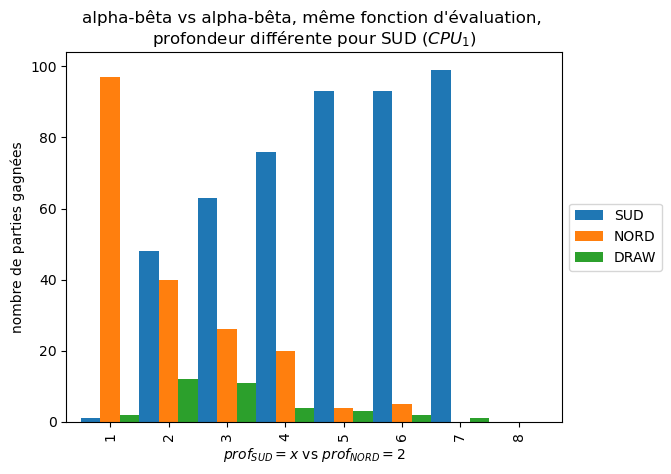

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(victoires)
df = df.rename(columns={None: "DRAW"})
df.index += 1
print("--- Table des données ---\n", df)
df.plot(
    kind="bar",
    width=1,
    xlabel="$prof_{SUD} = x$ vs $prof_{NORD} = 2$",
    ylabel="nombre de parties gagnées",
    title="alpha-bêta vs alpha-bêta, même fonction d'évaluation, \nprofondeur différente pour SUD ($CPU_1$)",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Plus l'ordinateur a accès à une profondeur grande pour son arbre de recherche, plus il gagne en efficacité, et *vice-versa* (99:0:1 pour profondeur = 7). Quand les joueurs artificiels ont accès à la même profondeur de recherche (dans notre cas : 2), il y a tendance à une égalité en termes de scores (48:40:12).

### Fonction d'évaluation `Ayo`


Soit la fonction d'évaluation en fonction d'une position $P$ :

$$f(P) = \sum_{i=1}^{12} w_i \times a_i$$

Avec :

- $w_i$ : les poids de chacun des termes de $f$. Ils sont compris entre $[0, 1]$ et dépendent de la profondeur de l'arbre de recherche.
- $a_1$ : le nombre de cases que l'adversaire peut utiliser pour capturer 2 graines (= cases contenant 1 graine) ($w_{1} = 0.06$).
- $a_2$ : le nombre de cases que l'adversaire peut utiliser pour capturer 3 graines (= cases contenant 2 graines) ($w_{2} = 0.20$).
- $a_3$ : le nombre de cases que l'IA peut utiliser pour capturer 2 graines (= cases contenant 1 graine) ($w_{3} = 0.93$).
- $a_4$ : le nombre de cases que l'IA peut utiliser pour capturer 3 graines (= cases contenant 2 graines) ($w_{4} = 0.93$).
- $a_5$ : le nombre de cases de l'adversaire avec suffisamment de graines pour atteindre le côté IA ($w_{5} = 0.13$).
- $a_6$ : le nombre de cases de l'IA avec suffisamment de graines pour atteindre le côté de l'adversaire ($w_{6} = 0.87$).
- $a_7$ : le nombre de cases de l'adversaire contenant plus de 12 graines ($w_{7} = 0.06$).
- $a_8$ : le nombre de cases de l'IA contenant plus de 12 graines ($w_{8} = 0.93$).
- $a_9$ : le score de l'adversaire ($w_{9} = 0.13$).
- $a_{10}$ : le score de l'IA ($w_{10} = 0.60$).
- $a_{11}$ : le nombre de cases vides de l'adversaire ($w_{11} = 1.00$).
- $a_{12}$ : le nombre de cases vides de l'IA ($w_{12} = 0.67$).

**Source** : Daoud, Mohammad & Kharma, Nawwaf & Haidar, A. & Popoola, J.. (2004). Ayo, the Awari player, or how better representation trumps deeper search. 1. 1001 - 1006 Vol.1. 10.1109/CEC.2004.1330971.

**Notes** :
- De part la construction initiale de nos algorithmes de recherche, on considérera toujours que c'est `'SUD'` (soit l'ordinateur) qui cherche à maximiser et `'NORD'` (soit l'adversaire de l'ordinateur) à minimiser cette fonction.
- L'optimisation de cette fonction réside dans ses poids, ici, on affectera aux poids de l'adversaire des poids négatifs (mais basés sur ceux trouvés dans l'article de recherche) (ce n'est sûrement pas la solution parfaite).
- On utilisera `numpy` pour simplifier le code.


In [ ]:
def cases_atteignables(position, trait):
    """
    Renvoie le nombre de cases qu'un camp peut atteindre pour une
    position donnée.
    Pour un camp :
        - il faut n graines pour atteindre l'adversaire depuis la case 1
        - il faut n - 1 graines pour atteindre l'adversaire depuis la case 2
        ...
        - il faut 1 graine pour atteindre l'adversaire depuis la case n
    """
    n = position["dimension"]
    count = 0
    if trait == "SUD":
        for i, case in enumerate(position["plateau"][:n]):
            if case >= n - i:
                count += 1
    else:
        for i, case in enumerate(position["plateau"][n:]):
            if case >= n - i:
                count += 1
    return count


def ayo(position):
    """POSITION -> int
    Retourne la valeur de la fonction d'évaluation de la position basé
    sur Ayo.
    """
    n = position["dimension"]
    plateau = np.array(position["plateau"])
    # poids initiaux
    # weights = np.array([-0.06, -0.20, 0.93, 0.93, -0.13, 0.87, -0.06, 0.93, -0.13, 0.60, -1, 0.67])  # profondeur = 3
    weights = np.array([-0.8, -1, 0.06, 0.00, -0.87, 0.60, -0.00, 0.20, -0.73, 0.93, 0.00, 0.80])  # profondeur = 5
    # calcul des features
    a1 = len([case for case in position["plateau"][:n] if case == 1])
    a2 = len([case for case in position["plateau"][:n] if case == 2])
    a3 = len([case for case in position["plateau"][n:] if case == 1])
    a4 = len([case for case in position["plateau"][n:] if case == 2])
    a5 = cases_atteignables(position, "NORD")
    a6 = cases_atteignables(position, "SUD")
    a7 = np.count_nonzero(plateau[n:] >= 12)
    a8 = np.count_nonzero(plateau[:n] >= 12)
    a9 = position["gain"]["NORD"]
    a10 = position["gain"]["SUD"]
    a11 = np.count_nonzero(plateau[n:] == 0)
    a12 = np.count_nonzero(plateau[:n] == 0)
    features = np.array([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12])
    return np.sum(weights * features)


print(evalue(maPosition3))
print(ayo(maPosition3))

3
4.77


In [ ]:
def alphabeta_ayo(position, prof, alpha=-sys.maxsize, beta=sys.maxsize):
    """str * int * int * int * func ->
    Retourne le coup optimal et son évaluation par l'algorithme alpha-bêta.
    """
    n = position["dimension"]
    trait = position["trait"]  # joueur qui doit jouer
    coup_optimal = 0
    n_feuilles = 0

    if prof == 0 or est_terminale(position):
        # si la position est terminale ou la profondeur de l'arbre est nul,
        # l'algorithme minimax s'arrête
        return (coup_optimal, ayo(position), 1)
    coups_possibles = list(range(1, n + 1))
    random.shuffle(coups_possibles)
    if trait == "SUD":  # le joueur cherche à maximiser le gain
        for coup in coups_possibles:
            nouvelle_position = effectue_si_valide(position, coup)
            if nouvelle_position:
                feuille = alphabeta_ayo(nouvelle_position, prof - 1, alpha, beta)
                n_feuilles += feuille[2]
                if feuille[1] > alpha:
                    coup_optimal = coup
                    alpha = feuille[1]
                if alpha >= beta:  # coupure beta
                    break
        return (coup_optimal, alpha, n_feuilles)

    else:  # le joueur cherche à minimiser le gain
        for coup in coups_possibles:
            nouvelle_position = effectue_si_valide(position, coup)
            if nouvelle_position:
                feuille = alphabeta_ayo(nouvelle_position, prof - 1, alpha, beta)
                n_feuilles += feuille[2]
                if feuille[1] < beta:
                    coup_optimal = coup
                    beta = feuille[1]
                if alpha >= beta:  # coupure alpha
                    break
        return (coup_optimal, beta, n_feuilles)


alphabeta_ayo(maPosition2, 4)

(6, -1.08, 244)

--- Table des données ---
     SUD  NORD  DRAW
2  84.0  13.0   3.0
3  73.0  20.0   7.0
4  49.0  30.0  21.0
5  40.0  49.0  11.0
6   5.0  92.0   3.0
7   9.0  90.0   1.0
8   0.0   0.0   0.0


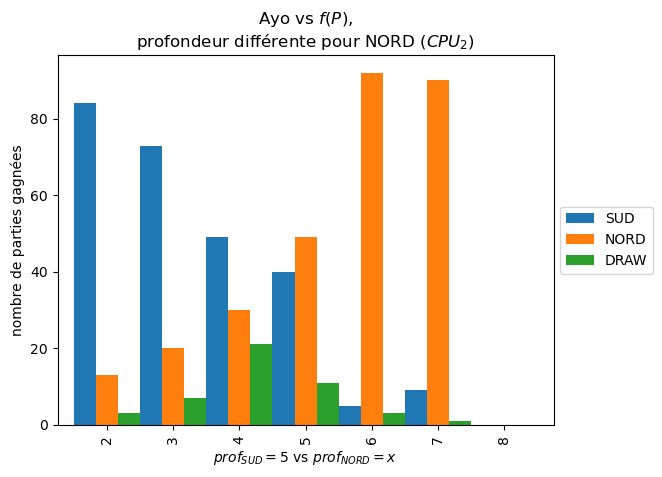

In [ ]:
df = pd.DataFrame(victoires)
df = df.rename(columns={None: "DRAW"})
df.index += 2
print("--- Table des données ---\n", df)
df.plot(
    kind="bar",
    width=1,
    xlabel="$prof_{SUD} = 5$ vs $prof_{NORD} = x$",
    ylabel="nombre de parties gagnées",
    title="Ayo vs $f(P)$,\nprofondeur différente pour NORD ($CPU_2$)",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Résultats intéressants, différents de ceux précédents. Ayo perd dès que l'alpha-bêta a une profondeur supérieure ou égale à la sienne, mais arrive quand même à gagner quelques parties. Les poids utilisés ne sont peut-être pas adaptés par rapport à la façon dont notre algorithme minimax a été conçu.

# Annexe : présentation du jeu d'Awélé

L'Awélé est un jeu d'origine africaine qui se joue sur un plateau (ou tablier) où chacun des 2 joueurs (Sud et Nord) possède 6 cases. Les règles de ce jeu sont simples et facilement implémentables.

Voir la page wikipédia (http://fr.wikipedia.org/wiki/Awalé) qui détaille les règles que nous utilisons ici.

### Règles du jeu

Dans la position de départ, toutes les cases sont remplies avec 4 graines. Le joueur dont
c'est le tour de jeu (on considère que le camp Sud débute toujours la partie.) choisit une de ses cases contenant des graines, et en retire toutes les graines qu'elle contient. Il sème alors ces graines une par une dans les cases suivantes dans le sens inverse des aiguilles d'une montre. Au cours de cette pose, s'il repasse sur la case qui contenait les graines au départ, il n'y dépose pas de graine.

Si la dernière graine est semée dans une case de l'adversaire contenant 2 ou 3 graines après la pose, les graines dans cette case sont capturées par le joueur et elles sont alors retirées du jeu (elles sont mises dans le gain du joueur). Dans ce cas, si l'avant-dernière case est aussi une case ennemie contenant 2 ou 3 graines, les graines en sont aussi capturées, et ainsi de suite tant que des prises sont possibles (toujours dans le camp ennemi).

Il est à noter qu'un coup n'effectue pas forcément une prise, mais si une prise existe à l'issue d'un coup, elle doit obligatoirement être réalisée totalement.

A l'issue du coup ainsi exécuté, il doit rester au moins une graine dans l'une des cases de l'adversaire (il ne faut pas ''affamer'' l'adversaire) sinon la position est considérée comme illégale et le coup ne peut pas être joué.

Dès qu'un joueur a capturé 25 graines ou plus, il est déclaré vainqueur de la partie et le jeu s'arrête.

Dans le cas où un joueur ne peut pas jouer, la partie s'arrête et toutes les graines restant sur le tablier sont capturées par son adversaire. Dans ce cas, le joueur qui a capturé le plus de graines a gagné.

### Représentation du tablier

Le tablier est toujours représenté avec les cases de Sud en bas.  
Les cases sont ordonnées et repérées par des chiffres, de 1 à 6, de la gauche vers la droite. Dans chaque case, on indique le nombre de graines qu'elle contient. Ainsi, le tablier de départ classique est donné ci-dessous:

<p/>
<table width="25%">
<tr>
<td>    
**NORD**<br>
$\begin{array}{|c|c|c|c|c|c|} \hline
      4 & 4 & 4 & 4 &	4 & 4\\
      \hline
      4 & 4 & 4 & 4 & 4 & 4\\
      \hline
\end{array}$<br>
**SUD**<br>
$\begin{array}{cccccc} 
      1 & 2 & 3 & 4 & 5 & 6\\
\end{array}$
</td>
</tr>
</table>

Un coup est noté en donnant le camp qui joue ainsi que le numéro de la case qui est vidée. Par exemple, $($SUD$, 2)$ si le camp Sud joue en prenant les graines de la deuxième case en partant de la gauche qui se trouve dans son camp. Ou alors, $($NORD$, 6)$ si le camp Nord joue en prenant les graines de la case numéro 6 qui se trouve dans son camp, c'est à dire la sixième case en partant de la gauche qui se trouve dans son camp, soit celle la plus en haut et à droite du tablier.

### Exemple de coup avec prise de graines

A partir de la position située à gauche dans la figure ci-dessous, Sud décide de jouer le coup $4$. La position au centre de la figure montre la situation intermédiaire, suite au dépôt des $6$ graines dans les $6$ cases qui suivent la case $4$ dans l'ordre inverse des aiguilles d'une montre.

<p />
<table width="60%">
<tr>
<td>Départ</td>
<td>SUD a réparti les graines de $4$</td>
<td>SUD retire les graines dans le camp NORD</td>
</tr>
<tr>
<td>
**NORD**<br>
$\begin{array}{|c|c|c|c|c|c|} \hline
 & 2 & 1 & 2 & 1 & 1\\
\hline
1 & & & {\bf 6} & & 1\\
     \hline
\end{array}$<br>
**SUD**
</td>
<td>
**NORD**<br>
$\begin{array}{|c|c|c|c|c|c|} \hline
& 2 & {\bf 2} & {\bf 3} & {\bf 2} & {\bf 2}\\
\hline
1 & & & & {\bf 1} & {\bf 2}\\
      \hline
\end{array}$<br>
**SUD**
</td>
<td>
**NORD**<br>
$\begin{array}{|c|c|c|c|c|c|} \hline
& 2 & & & & \\
\hline
1 & & & & {\bf 1} & {\bf 2}\\
      \hline
\end{array}$<br>
**SUD**
</td>
</tr>
<tr>
<td>
$\begin{array}{cccccc} 
      1 & 2 & 3 & 4 & 5 & 6\\
\end{array}$
</td>
<td>
$\begin{array}{cccccc} 
      1 & 2 & 3 & 4 & 5 & 6\\
\end{array}$
</td>
<td>
$\begin{array}{cccccc} 
      1 & 2 & 3 & 4 & 5 & 6\\
\end{array}$
</td>
</tr>

</table>

Comme la dernière case où une graine a été posée (la case $3$ du camp Nord) contient maintenant $2$ graines, celles-ci sont prises par Sud, ainsi que celles des cases $4$, $5$ et $6$ qui contiennent (en suivant cet ordre) $2$ ou $3$ graines. Au total, avec ce coup, Sud prend $9$ graines. A l'issue des prises réalisées, on obtient finalement la nouvelle position présentée à droite de la figure. Maintenant, Nord n'a qu'une seule possibilité et doit jouer les graines de la case $2$.


## Annexe : un peu de langage Python...

### Documentation

Quelques liens utiles pour se documenter sur le langage Python :

- Tutoriel : http://python.developpez.com/cours/
- Documentation officielle : https://docs.python.org/fr/3/

### Quelques fonctions utiles

- Saisie d'une valeur au clavier (noter que la fonction <code>input</code> retourne une chaîne de caractères) :
    <pre>
    saisie = input("Entrez un nombre :")
    </pre>
- Pour utiliser des fonctions de gestion de l'aléatoire :
  <pre>
  import random
  </pre> - génération d'une valeur aléatoire comprise entre 1 et 10 inclus :
  <pre>
  random.randint(1,10)
  </pre> - tirage aléatoire d'un élément dans une liste :
  <pre>
  random.choice(['a','b','c','d','e','f'])
  </pre>
